In [1]:
import pandas as pd
import numpy as np

In [2]:
# read csv
df = pd.read_csv('usd.csv')

In [3]:
df['content']

0           @banunfrd Alhamdulillah nune, di sadhar nune~
1       @mardevvv Aku pen siomay sichan deket sadhar w...
2                      @libraegirl Cilok deket sadhar kuy
3                     @Reynaldi_Haris aku di sadhar reyyy
4       @paper1aeroplane YaAllaahh deketaan wkwkwk aku...
                              ...                        
2495    Jadi food enthusiasts aja nduk sembari dibuat ...
2496                      braves ada di sadhar paingan :)
2497    @pujiwijaya Ada lho kak, anak psikologi yg aku...
2498    Temen temen aing perasaan baru pada sidang ter...
2499    Masih teringat jelas di otakku pas makan yami ...
Name: content, Length: 2500, dtype: object

# Rename Raw Data

In [4]:
df['content'].to_csv('usd-raw.csv')

### Text Preprocessing

In [5]:
import re
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
from nltk.corpus import stopwords

### Regex Cleansing

In [6]:
def cleantext(tweet):
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    tweet = re.sub(r'^http://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+http://t.co/[a-zA-Z0-9]*$', ' ', tweet)
    tweet = re.sub(r'^www://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+//www://t.co/[a-zA-Z0-9]*\s', ' ', tweet)
    tweet = re.sub(r'\s+//www://t.co/[a-zA-Z0-9]*$', ' ', tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    return tweet

In [7]:
dfc = df['content'].apply(cleantext)

In [8]:
dfc

0                       alhamdulillah nune di sadhar nune
1       aku pen siomay sichan deket sadhar wkwk modela...
2                                  cilok deket sadhar kuy
3                               haris aku di sadhar reyyy
4       yaallaahh deketaan wkwkwk aku di sadhar faaan ...
                              ...                        
2495    jadi food enthusiasts aja nduk sembari dibuat ...
2496                         braves ada di sadhar paingan
2497    ada lho kak anak psikologi yg aku kenal bukan ...
2498    temen temen aing perasaan baru pada sidang ter...
2499    masih teringat jelas di otakku pas makan yami ...
Name: content, Length: 2500, dtype: object

## Stemming

In [9]:
dfcs = dfc.apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [10]:
dfcs

0                       alhamdulillah nune di sadhar nune
1       aku pen siomay sichan deket sadhar wkwk model ...
2                                  cilok deket sadhar kuy
3                               haris aku di sadhar reyyy
4       yaallaahh deketaan wkwkwk aku di sadhar faaan ...
                              ...                        
2495    jadi food enthusiasts aja nduk sembari buat bl...
2496                           braves ada di sadhar paing
2497    ada lho kak anak psikologi yg aku kenal bukan ...
2498    temen temen aing asa baru pada sidang terus la...
2499    masih ingat jelas di otak pas makan yami koko ...
Name: content, Length: 2500, dtype: object

## Stopwords

In [11]:
dfcst = dfcs.apply(lambda x: ' '.join([word for word 
                                   in x.split() if word not in stopwords.words('indonesian')]))

In [12]:
dfcst

0                          alhamdulillah nune sadhar nune
1       pen siomay sichan deket sadhar wkwk model pcs ...
2                                  cilok deket sadhar kuy
3                                      haris sadhar reyyy
4             yaallaahh deketaan wkwkwk sadhar faaan wkwk
                              ...                        
2495    food enthusiasts aja nduk sembari blog amp rev...
2496                                  braves sadhar paing
2497    lho kak anak psikologi yg kenal anak sadhar ny...
2498    temen temen aing asa sidang langsung wisuda sa...
2499    otak pas makan yami koko anak atma ngomong tem...
Name: content, Length: 2500, dtype: object

# Rename Cleaned Data

In [13]:
dfcst.to_csv('usd-cleaned.csv')

### TF-IDF Vectorizer

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = dfcst
vectorizer = TfidfVectorizer(max_features=2000, min_df=3, max_df=0.6, 
                             stop_words=stopwords.words('indonesian'))
X = vectorizer.fit_transform(corpus).toarray()

D:\Atmajaya\Anaconda\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [15]:
tfidf = pd.DataFrame(X, columns=vectorizer.get_feature_names()).sum().sort_values(ascending=False)

# Rename TF-IDF

In [16]:
tfidf.to_csv('tfidf-usd.csv')

### POS-Tagging

In [17]:
from nltk.tag import CRFTagger

In [18]:
def preprocessing(text):
    case_folded = text.lower()
    tokenized = nltk.word_tokenize(case_folded)
    return tokenized

In [19]:
dfcst_preprocessed = dfcst.apply(preprocessing)

In [20]:
dfcst_preprocessed

0                     [alhamdulillah, nune, sadhar, nune]
1       [pen, siomay, sichan, deket, sadhar, wkwk, mod...
2                             [cilok, deket, sadhar, kuy]
3                                  [haris, sadhar, reyyy]
4       [yaallaahh, deketaan, wkwkwk, sadhar, faaan, w...
                              ...                        
2495    [food, enthusiasts, aja, nduk, sembari, blog, ...
2496                              [braves, sadhar, paing]
2497    [lho, kak, anak, psikologi, yg, kenal, anak, s...
2498    [temen, temen, aing, asa, sidang, langsung, wi...
2499    [otak, pas, makan, yami, koko, anak, atma, ngo...
Name: content, Length: 2500, dtype: object

In [21]:
ct = CRFTagger()
ct.set_model_file('all_indo_man_tag_corpus_model.crf.tagger')

In [22]:
tag = ct.tag_sents(dfcst_preprocessed)

In [23]:
tag

[[('alhamdulillah', 'NN'), ('nune', 'FW'), ('sadhar', 'FW'), ('nune', 'FW')],
 [('pen', 'NN'),
  ('siomay', 'FW'),
  ('sichan', 'FW'),
  ('deket', 'FW'),
  ('sadhar', 'FW'),
  ('wkwk', 'FW'),
  ('model', 'FW'),
  ('pcs', 'FW'),
  ('huhu', 'FW')],
 [('cilok', 'VB'), ('deket', 'FW'), ('sadhar', 'FW'), ('kuy', 'FW')],
 [('haris', 'NN'), ('sadhar', 'FW'), ('reyyy', 'FW')],
 [('yaallaahh', 'VB'),
  ('deketaan', 'NN'),
  ('wkwkwk', 'NN'),
  ('sadhar', 'NN'),
  ('faaan', 'NN'),
  ('wkwk', 'JJ')],
 [('hmmm', 'NN'),
  ('coba', 'VB'),
  ('gletak', 'NN'),
  ('helm', 'NN'),
  ('nya', 'NN'),
  ('rin', 'NN'),
  ('kali', 'NN'),
  ('aja', 'NN'),
  ('goyot', 'FW'),
  ('sadhar', 'FW')],
 [('kost', 'FW'),
  ('ac', 'FW'),
  ('nonac', 'FW'),
  ('rb', 'FW'),
  ('bln', 'FW'),
  ('kmr', 'FW'),
  ('dlm', 'FW'),
  ('sebrang', 'FW'),
  ('amplas', 'FW'),
  ('dkt', 'FW'),
  ('uin', 'FW'),
  ('uny', 'FW'),
  ('sadhar', 'FW'),
  ('jogja', 'FW'),
  ('hub', 'FW')],
 [('sadhar', 'VB'), ('ga', 'NN'), ('nih', 'JJ')],
 [(

In [24]:
df_tagger = pd.DataFrame([j for i in tag for j in i])

In [25]:
df_tagger = df_tagger.rename(columns={0:'Word',1:'POS'})

In [26]:
df_tagger

,Word,POS
0,alhamdulillah,NN
1,nune,FW
2,sadhar,FW
3,nune,FW
4,pen,NN
...,...,...
22336,yami,VB
22337,nahan,NN
22338,biar,CD
22339,ga,NN


# Rename POS Tagger

In [27]:
df_tagger.to_csv('usd-tagger.csv')

### Merge Dataset

In [28]:
tfidf = pd.DataFrame(tfidf).reset_index().rename(columns={'index':'Word', 0:'Weight'})

In [29]:
weighted_tag = tfidf.merge(df_tagger).drop_duplicates(subset='Word').reset_index().drop('index',axis=1)

In [30]:
weighted_tag.to_csv('weighted_tag-usd.csv')

In [31]:
pos_tag = pd.concat([weighted_tag[weighted_tag['POS']=='JJ'].head(50), 
          weighted_tag[weighted_tag['POS']=='NN'].head(50),
          weighted_tag[weighted_tag['POS']=='VB'].head(50)]).reset_index().drop('index',axis=1)

In [32]:
pos_tag.to_csv('pos_tag-usd.csv')

### bi-gram

In [56]:
pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),2)).value_counts()

(anak, sadhar)      103
(kampus, sadhar)     80
(sadhar, sadhar)     71
(deket, sadhar)      68
(sadhar, mrican)     60
                   ... 
(budaya, budaya)      1
(main, bareng)        1
(oooh, yaaa)          1
(mas, wing)           1
(akeh, colok)         1
Length: 18528, dtype: int64

In [57]:
bigram_df = pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),
                      2)).value_counts().head(20)\
.to_frame().reset_index().rename(columns={0:'bigram',1:'count'})

In [58]:
bigram_df

,index,bigram
0,"(anak, sadhar)",103
1,"(kampus, sadhar)",80
2,"(sadhar, sadhar)",71
3,"(deket, sadhar)",68
4,"(sadhar, mrican)",60
5,"(kuliah, sadhar)",49
6,"(meme, sadhar)",40
7,"(sadhar, kampus)",34
8,"(sadhar, ya)",33
9,"(sadhar, aja)",30


In [59]:
# create dictionary of bigrams and their counts
d = bigram_df.set_index('index').T.to_dict('records')

In [60]:
d

[{('anak', 'sadhar'): 103,
  ('kampus', 'sadhar'): 80,
  ('sadhar', 'sadhar'): 71,
  ('deket', 'sadhar'): 68,
  ('sadhar', 'mrican'): 60,
  ('kuliah', 'sadhar'): 49,
  ('meme', 'sadhar'): 40,
  ('sadhar', 'kampus'): 34,
  ('sadhar', 'ya'): 33,
  ('sadhar', 'aja'): 30,
  ('sadhar', 'paing'): 29,
  ('sadhar', 'jogja'): 29,
  ('mas', 'sadhar'): 26,
  ('bal', 'sadhar'): 25,
  ('sadhar', 'yg'): 22,
  ('deket', 'kampus'): 20,
  ('sadhar', 'atma'): 20,
  ('yg', 'sadhar'): 20,
  ('sadhar', 'wkwk'): 19,
  ('sasing', 'sadhar'): 19}]

In [61]:
import networkx as nx

In [65]:
# create network plot
G = nx.Graph()

# create connections between nodes
for k,v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))
    
G.add_node("sadhar",weight=100)

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

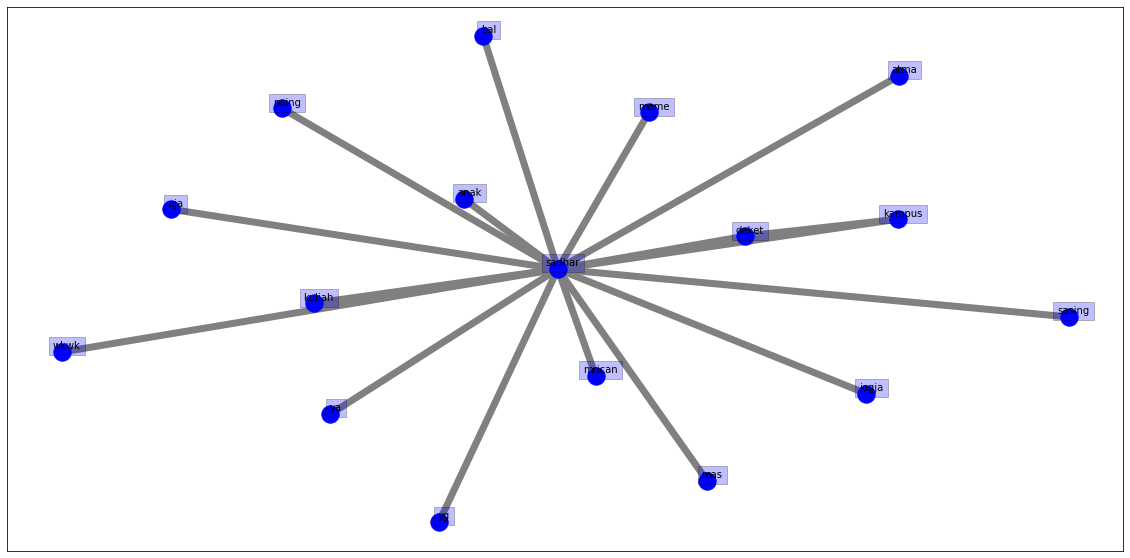

In [67]:
fig, ax = plt.subplots(figsize=(20,10))

pos = nx.spring_layout(G, k=2)

# plot networks
nx.draw_networkx(G, pos,
                font_size=10,
                width=7,
                edge_color='grey',
                node_color='blue',
                with_labels=False,
                ax=ax)

# create offset labels
for key, value in pos.items():
    x,y = value[0]+.01, value[1]+.01
    ax.text(x, y,
           s=key,
           bbox=dict(facecolor='blue', alpha=0.25),
           horizontalalignment='center', fontsize=10)
    
plt.show()

### tri-grams

In [68]:
pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),3)).value_counts()

(deket, kampus, sadhar)         17
(mundur, alon, alon)            13
(bal, sadhar, utara)            11
(kampung, bal, sadhar)          11
(uny, amikom, kalijaga)         11
                                ..
(khawatir, suasana, politik)     1
(belah, sadhar, uny)             1
(buka, coba, buka)               1
(chunian, dist, kasur)           1
(ku, lulus, alhamdulilah)        1
Length: 21450, dtype: int64

In [69]:
trigram_df = pd.Series(nltk.ngrams(nltk.word_tokenize(' '.join([i for i in dfcst.dropna()])),
                      3)).value_counts().head(20)\
.to_frame().reset_index().rename(columns={0:'trigram',1:'count'})

In [70]:
trigram_df

,index,trigram
0,"(deket, kampus, sadhar)",17
1,"(mundur, alon, alon)",13
2,"(bal, sadhar, utara)",11
3,"(kampung, bal, sadhar)",11
4,"(uny, amikom, kalijaga)",11
5,"(kalijaga, ust, sadhar)",11
6,"(amikom, kalijaga, ust)",11
7,"(upn, uny, amikom)",11
8,"(ust, sadhar, ity)",10
9,"(college, gurusar, sadhar)",9


In [71]:
# create dictionary of bigrams and their counts
d1 = trigram_df.set_index('index').T.to_dict('records')

In [72]:
d1

[{('deket', 'kampus', 'sadhar'): 17,
  ('mundur', 'alon', 'alon'): 13,
  ('bal', 'sadhar', 'utara'): 11,
  ('kampung', 'bal', 'sadhar'): 11,
  ('uny', 'amikom', 'kalijaga'): 11,
  ('kalijaga', 'ust', 'sadhar'): 11,
  ('amikom', 'kalijaga', 'ust'): 11,
  ('upn', 'uny', 'amikom'): 11,
  ('ust', 'sadhar', 'ity'): 10,
  ('college', 'gurusar', 'sadhar'): 9,
  ('khalsa', 'college', 'gurusar'): 9,
  ('arie', 'sadhar', 'days'): 9,
  ('puri', 'gejayan', 'indah'): 9,
  ('alon', 'mergo', 'sadhar'): 8,
  ('mergo', 'sadhar', 'sopo'): 8,
  ('h', 'khalsa', 'college'): 7,
  ('kampus', 'sadhar', 'mrican'): 7,
  ('kampus', 'sadhar', 'paing'): 7,
  ('alon', 'alon', 'mergo'): 7,
  ('sadhar', 'utara', 'banjit'): 6}]

In [73]:
# create network plot
G = nx.Graph()

# create connections between nodes
for k,v in d1[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))
    
G.add_node("sadhar",weight=100)

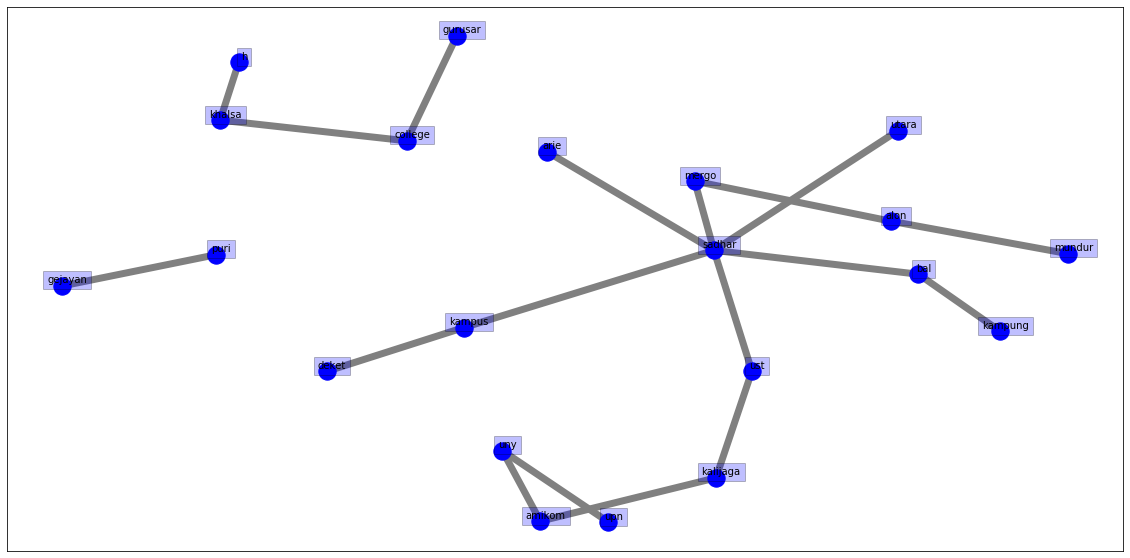

In [78]:
fig, ax = plt.subplots(figsize=(20,10))

pos = nx.spring_layout(G, k=3)

# plot networks
nx.draw_networkx(G, pos,
                font_size=10,
                width=7,
                edge_color='grey',
                node_color='blue',
                with_labels=False,
                ax=ax)

# create offset labels
for key, value in pos.items():
    x,y = value[0]+.01, value[1]+.01
    ax.text(x, y,
           s=key,
           bbox=dict(facecolor='blue', alpha=0.25),
           horizontalalignment='center', fontsize=10)
    
plt.show()

In [49]:
pwd

'C:\\Users\\Andika\\Desktop\\Project UNISA\\in depth analysis\\kampus kristiani jogja\\usd'